# K-Medoids Clustering for Customer Segmentation

* Developed a custom K-Medoids Clustering algorithm on the same dataset, clustering customers with various K values (2, 3, 4) to analyze medoid-based groupings.

* Used visualizations to interpret clusters and proposed actionable marketing insights based on identified customer segments.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Step 1: Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Step 2: Preprocess the data
# Encode categorical variable 'Gender'
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
# Step 3: Choose appropriate features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features].values

# Step 4: Try different K values
k_values = [2, 3, 4]

In [12]:
for k in k_values:
    # Step 5: Perform K-medoids clustering on the selected features
    # Initialize medoids randomly
    medoids_indices = np.random.choice(X.shape[0], size=k, replace=False)
    medoids = X[medoids_indices]

    max_iter = 100
for _ in range(max_iter):
    # Assign each point to the nearest medoid
    distances = np.sum(np.abs(X[:, np.newaxis] - medoids), axis=-1)
    labels = np.argmin(distances, axis=1)

    # Update medoids
    new_medoids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # Check for convergence
    if np.array_equal(medoids, new_medoids):
        break

    medoids = new_medoids

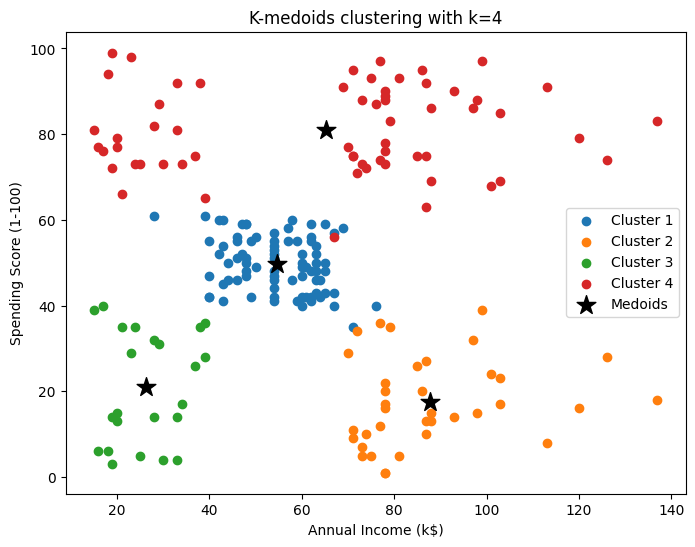

In [13]:
# Step 6: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.title(f'K-medoids clustering with k={k}')
plt.xlabel(features[1])
plt.ylabel(features[2])
for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')
plt.scatter(medoids[:, 1], medoids[:, 2], marker='*', s=200, c='black', label='Medoids')
plt.legend()
plt.show()

In [14]:
# Step 7: Interpret the results and provide recommendations for marketing strategies
print(f'Recommendations for k={k}:')
for i in range(k):
    cluster_data = data.iloc[labels == i]
    print(f'Cluster {i+1}:')
    print(cluster_data.describe())
    print('\n')

Recommendations for k=4:
Cluster 1:
       CustomerID    Gender        Age  Annual Income (k$)  \
count   80.000000  80.00000  80.000000           80.000000   
mean    84.575000   0.58750  43.037500           54.600000   
std     24.335615   0.49539  16.355577            9.245731   
min     28.000000   0.00000  18.000000           28.000000   
25%     64.750000   0.00000  27.750000           47.750000   
50%     84.500000   1.00000  46.500000           54.000000   
75%    104.250000   1.00000  54.250000           62.000000   
max    143.000000   1.00000  70.000000           76.000000   

       Spending Score (1-100)  
count               80.000000  
mean                49.775000  
std                  6.419856  
min                 35.000000  
25%                 44.750000  
50%                 50.000000  
75%                 55.000000  
max                 61.000000  


Cluster 2:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   36.000000  36.000000  36.000000  